In [4]:
try:
    h2o.remove_all()
    h2o.cluster().shutdown()
except:
    pass

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
import h2o
from h2o.estimators.word2vec import H2OWord2vecEstimator
from nltk.corpus import stopwords
from nltk import word_tokenize
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators import H2ORandomForestEstimator
#from sklearn.kernel_approximation import RBFSampler
import time

In [3]:
#helper functions
#get stop words
#nltk.download()
STOP_WORDS=list(stopwords.words('english'))

def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

    


In [5]:
h2o.init(min_mem_size='29G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\Lanier\AppData\Roaming\Python\Python36\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Lanier\AppData\Local\Temp\tmpqq4h81f1
  JVM stdout: C:\Users\Lanier\AppData\Local\Temp\tmpqq4h81f1\h2o_Lanier_started_from_python.out
  JVM stderr: C:\Users\Lanier\AppData\Local\Temp\tmpqq4h81f1\h2o_Lanier_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_Lanier_0wkxwo
H2O cluster total nodes:,1
H2O cluster free memory:,27.79 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"accepting new members, healthy"


#### Load data

In [5]:

#load data

train_data=h2o.import_file('train.csv')
#test_data=h2o.import_file('test.csv',header=1) #kagle provided this but we won't use it unless we want to submit


Parse progress: |█████████████████████████████████████████████████████████| 100%


#### Vectorize Text (Sibi already did this, this can be skipped)

In [6]:
#load pretrained embeddings
#gl=h2o.import_file('glove.6B.300d.txt')

In [7]:

#This converts sentenses into vectors

#words_train=tokenize(train_data['question_text'])
#words_test=tokenize(train_data['question_text'])
#w2v_model = H2OWord2vecEstimator(pre_trained=gl)
#w2v_model.train(training_frame=words_train)
#train_questions= w2v_model.transform(words_train, aggregate_method = "AVERAGE")
#test_questions= w2v_model.transform(words_test, aggregate_method = "AVERAGE") #kaggle gave this file for its competition we don't need it
#train_questions=train_questions.cbind(train_data['target'])
#del train_data #free up ram


In [8]:
#h2o.export_file(train_questions,"vectorized_train.csv",force=True)
#h2o.export_file(test_questions,"vectorized_test.csv",force=True) #kaggle gave this file for its competition we don't need it

In [9]:
#h2o.remove_all()


#### Train models

In [39]:
train_questions=h2o.import_file("train_glove480.csv") #use pretrained by Sibi instead
#train_questions=h2o.import_file("vectorized_train.csv") #use pretrained by Sibi instead
#test_questions=h2o.import_file("vectorized_test.csv") #kaggle gave this file for its competition we don't need it
train_questions


Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C220,C221,C222,C223,C224,C225,C226,C227,C228,C229,C230,C231,C232,C233,C234,C235,C236,C237,C238,C239,C240,C241,C242,C243,C244,C245,C246,C247,C248,C249,C250,C251,C252,C253,C254,C255,C256,C257,C258,C259,C260,C261,C262,C263,C264,C265,C266,C267,C268,C269,C270,C271,C272,C273,C274,C275,C276,C277,C278,C279,C280,C281,C282,C283,C284,C285,C286,C287,C288,C289,C290,C291,C292,C293,C294,C295,C296,C297,C298,C299,C300,C301,C302
00002165364db923c7e6,0.0510106,0.00532269,0.00755154,-0.0295723,0.245782,-0.0820922,-0.0341224,0.0510615,-0.0168528,2.36619,-0.264331,-0.0935255,0.0593031,-0.0726281,0.0512527,-0.012673,-0.00064738,0.670599,-0.108071,-0.152699,0.133436,-0.167754,0.0637519,0.00876994,-0.0673889,0.114964,-0.110361,0.148749,-0.12667,0.083761,0.0287516,0.15943,0.0502208,0.0773172,0.189724,-0.0678288,-0.0469008,0.0153311,-0.193426,-0.00298523,0.00544435,0.178721,0.0755265,-0.117596,0.13214,-0.0909577,-0.0442642,0.0459688,0.0472374,0.0183408,-0.210162,0.205587,-0.0262212,-0.0387465,0.159077,0.0748414,0.0663811,-0.0861276,0.129072,-0.0524235,-0.166051,-0.0227882,-0.0936252,0.188334,0.0332548,0.145394,-0.0623804,0.00390968,0.120383,0.0301137,-0.0244256,0.159174,0.042682,-0.0779583,0.162933,0.00124177,0.00349442,-0.0498627,0.0383422,0.164524,-0.0431332,0.176004,-0.00732792,-0.0421539,0.0640984,-0.144935,-0.312476,-0.26345,0.0135457,0.120775,-0.275555,0.15162,0.0195971,0.0873649,0.19298,-0.006572,0.0765897,0.059612,-0.0100935,-0.0550236,-0.131147,0.121238,0.0829547,-0.0487254,0.15724,-1.03149,0.0669909,-0.0637764,0.0266144,0.0291574,-0.0186974,-0.0372635,0.0119358,-0.0974339,-0.0559585,-0.0308403,0.110768,0.0789191,-0.154074,0.00651798,0.0214982,-0.0360729,-0.15425,0.0840733,0.0442981,0.0911856,0.119896,0.0221807,0.0891914,-0.0266729,-0.0838842,0.0100425,-0.0358176,-0.00042508,0.160823,-0.0226856,-0.051957,0.0159455,0.0367605,-0.069799,-0.994596,0.01978,0.2334,-0.0553575,0.0377172,-0.0619433,0.00513015,0.144915,0.0256216,-0.0176644,-0.00756514,0.2013,0.0227414,-0.0489881,-0.0606911,0.0251843,-0.0752936,-0.0310748,-0.114389,0.0866806,-0.0450352,0.160894,-0.048542,0.0495197,-0.0680022,0.0814201,0.112634,-0.160573,0.189174,-0.0610462,0.0200019,0.0288005,-0.0682022,0.0332253,-0.0331904,-0.0692218,-0.00248346,0.0413618,0.00099592,-0.0944012,0.049238,0.110165,-0.0970975,-0.239509,0.0370639,0.0349803,-0.0248835,-0.0586104,-0.00660677,-0.0899496,-0.0275635,-0.00743977,0.0612449,-0.00754838,0.0139347,0.0280194,0.0726349,-0.0485727,-0.00725315,0.119667,-0.0117509,0.200289,-0.0666595,0.0397169,0.255362,-0.0474539,0.0220977,-0.17343,0.0798993,0.0656131,-0.00518846,0.0470785,-0.0321935,-0.0666891,-0.0790958,0.140139,-0.104769,0.125647,-0.0217403,-0.0548543,0.0605896,0.0143649,0.0714595,-0.0256251,-0.0397749,-0.0650754,0.0721566,0.182636,0.0098881,0.164632,-0.110615,0.158964,0.021538,-0.0701125,-0.0777323,-0.08546,-0.002659,-0.0360412,0.089756,0.0499071,-0.0185205,0.159132,0.151317,-0.0153471,0.168736,-0.131951,0.0147602,-0.112879,-0.208412,-0.184408,0.0867634,0.0692656,0.0286499,0.00183753,0

In [40]:
#rename target column
train_questions['target']=train_questions['C302']
train_questions=train_questions.drop(['C302'])
train_questions=train_questions.drop(['C1'])
train_questions

C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142,C143,C144,C145,C146,C147,C148,C149,C150,C151,C152,C153,C154,C155,C156,C157,C158,C159,C160,C161,C162,C163,C164,C165,C166,C167,C168,C169,C170,C171,C172,C173,C174,C175,C176,C177,C178,C179,C180,C181,C182,C183,C184,C185,C186,C187,C188,C189,C190,C191,C192,C193,C194,C195,C196,C197,C198,C199,C200,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C220,C221,C222,C223,C224,C225,C226,C227,C228,C229,C230,C231,C232,C233,C234,C235,C236,C237,C238,C239,C240,C241,C242,C243,C244,C245,C246,C247,C248,C249,C250,C251,C252,C253,C254,C255,C256,C257,C258,C259,C260,C261,C262,C263,C264,C265,C266,C267,C268,C269,C270,C271,C272,C273,C274,C275,C276,C277,C278,C279,C280,C281,C282,C283,C284,C285,C286,C287,C288,C289,C290,C291,C292,C293,C294,C295,C296,C297,C298,C299,C300,C301,target
0.0510106,0.00532269,0.00755154,-0.0295723,0.245782,-0.0820922,-0.0341224,0.0510615,-0.0168528,2.36619,-0.264331,-0.0935255,0.0593031,-0.0726281,0.0512527,-0.012673,-0.00064738,0.670599,-0.108071,-0.152699,0.133436,-0.167754,0.0637519,0.00876994,-0.0673889,0.114964,-0.110361,0.148749,-0.12667,0.083761,0.0287516,0.15943,0.0502208,0.0773172,0.189724,-0.0678288,-0.0469008,0.0153311,-0.193426,-0.00298523,0.00544435,0.178721,0.0755265,-0.117596,0.13214,-0.0909577,-0.0442642,0.0459688,0.0472374,0.0183408,-0.210162,0.205587,-0.0262212,-0.0387465,0.159077,0.0748414,0.0663811,-0.0861276,0.129072,-0.0524235,-0.166051,-0.0227882,-0.0936252,0.188334,0.0332548,0.145394,-0.0623804,0.00390968,0.120383,0.0301137,-0.0244256,0.159174,0.042682,-0.0779583,0.162933,0.00124177,0.00349442,-0.0498627,0.0383422,0.164524,-0.0431332,0.176004,-0.00732792,-0.0421539,0.0640984,-0.144935,-0.312476,-0.26345,0.0135457,0.120775,-0.275555,0.15162,0.0195971,0.0873649,0.19298,-0.006572,0.0765897,0.059612,-0.0100935,-0.0550236,-0.131147,0.121238,0.0829547,-0.0487254,0.15724,-1.03149,0.0669909,-0.0637764,0.0266144,0.0291574,-0.0186974,-0.0372635,0.0119358,-0.0974339,-0.0559585,-0.0308403,0.110768,0.0789191,-0.154074,0.00651798,0.0214982,-0.0360729,-0.15425,0.0840733,0.0442981,0.0911856,0.119896,0.0221807,0.0891914,-0.0266729,-0.0838842,0.0100425,-0.0358176,-0.00042508,0.160823,-0.0226856,-0.051957,0.0159455,0.0367605,-0.069799,-0.994596,0.01978,0.2334,-0.0553575,0.0377172,-0.0619433,0.00513015,0.144915,0.0256216,-0.0176644,-0.00756514,0.2013,0.0227414,-0.0489881,-0.0606911,0.0251843,-0.0752936,-0.0310748,-0.114389,0.0866806,-0.0450352,0.160894,-0.048542,0.0495197,-0.0680022,0.0814201,0.112634,-0.160573,0.189174,-0.0610462,0.0200019,0.0288005,-0.0682022,0.0332253,-0.0331904,-0.0692218,-0.00248346,0.0413618,0.00099592,-0.0944012,0.049238,0.110165,-0.0970975,-0.239509,0.0370639,0.0349803,-0.0248835,-0.0586104,-0.00660677,-0.0899496,-0.0275635,-0.00743977,0.0612449,-0.00754838,0.0139347,0.0280194,0.0726349,-0.0485727,-0.00725315,0.119667,-0.0117509,0.200289,-0.0666595,0.0397169,0.255362,-0.0474539,0.0220977,-0.17343,0.0798993,0.0656131,-0.00518846,0.0470785,-0.0321935,-0.0666891,-0.0790958,0.140139,-0.104769,0.125647,-0.0217403,-0.0548543,0.0605896,0.0143649,0.0714595,-0.0256251,-0.0397749,-0.0650754,0.0721566,0.182636,0.0098881,0.164632,-0.110615,0.158964,0.021538,-0.0701125,-0.0777323,-0.08546,-0.002659,-0.0360412,0.089756,0.0499071,-0.0185205,0.159132,0.151317,-0.0153471,0.168736,-0.131951,0.0147602,-0.112879,-0.208412,-0.184408,0.0867634,0.0692656,0.0286499,0.00183753,0.0677578,0.239901,-0.0

In [41]:
#convert target to category

train_questions['target']=train_questions['target'].ascharacter().asfactor()

In [42]:
len(train_questions)

1306118

In [44]:
train_questions, test=train_questions.split_frame(ratios=[.99])
sample_percent_increment=.00152513966480446927374301676
print(sample_percent_increment*len(train_questions))
#646.5725

1952.7171452513967


In [15]:
len(test)

12957

In [16]:
%%capture output

x=train_questions.columns
y='target'
x.remove(y)



#test_results_glm=[]
#test_results_gbm=[]
#test_results_DL=[]
test_results_RF=[]
#Auc_results_glm=[]
#Auc_results_gbm=[]
#Auc_results_DL=[]
Auc_results_RF=[]
#glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True,remove_collinear_columns =True,validation_frame=test)
#gbm_model = H2OGradientBoostingEstimator(validation_frame=test)
#DL_model = H2ODeepLearningEstimator(validation_frame=test)
#B_model = H2ONaiveBayesEstimator(validation_frame=test)
RF_model = H2ORandomForestEstimator(validation_frame=test)
running_increment=sample_percent_increment
for i in range(30) :   
    train_questions_sam=train_questions.split_frame(ratios=[running_increment])[0]
    #glm_model.train(y = y, x = x, training_frame = train_questions_sam)
    #gbm_model.train(y = y, x = x, training_frame = train_questions_sam)
    #DL_model.train(y = y, x = x, training_frame = train_questions_sam)
    RF_model.train(y = y, x = x, training_frame = train_questions_sam)
    #pred_test_glm=glm_model.predict(test)
    #pred_test_gbm=gbm_model.predict(test)
    #pred_test_DL=DL_model.predict(test)
    pred_test_RF=RF_model.predict(test)
    #print(glm_model)
    #print(gbm_model)
    #print(DL_model)
    print(RF_model)
   # print("GLM acc:" + str(np.mean((pred_test_glm['predict']==test['target']).as_data_frame())))
    #print("GBM acc:" + str(np.mean((pred_test_gbm['predict']==test['target']).as_data_frame())))
    #print("DL acc:" + str(np.mean((pred_test_DL['predict']==test['target']).as_data_frame())))
    print("RF acc:" + str(np.mean((pred_test_RF['predict']==test['target']).as_data_frame())))
   # test_results_glm.append(np.mean((pred_test_glm['predict']==test['target']).as_data_frame()))
    #test_results_gbm.append(np.mean((pred_test_gbm['predict']==test['target']).as_data_frame()))
    #test_results_DL.append(np.mean((pred_test_DL['predict']==test['target']).as_data_frame()))
    test_results_RF.append(np.mean((pred_test_RF['predict']==test['target']).as_data_frame()))
    #Auc_results_glm.append(glm_model.auc(valid=True))
    #Auc_results_gbm.append(gbm_model.auc(valid=True))
    #Auc_results_DL.append(DL_model.auc(valid=True))
    Auc_results_RF.append(RF_model.auc(valid=True))
    running_increment=running_increment+sample_percent_increment
    
    

In [17]:
results_list = pd.DataFrame(
    {#'glm_test': test_results_glm,
     #'gbm_test': test_results_gbm,
     #'DL_test': test_results_DL,
     'RF_test': test_results_RF,
     #'AUC_glm_test': Auc_results_glm,
     #'AUC_gbm_test': Auc_results_gbm,
     #'AUC_DL_test': Auc_results_DL,
     'AUC_RF_test': Auc_results_RF
    })
results_list.to_csv("Result1_RF2.csv")

In [18]:
cell_out=str(output)
text_file=open("results1_RF2.txt","w")
text_file.write(cell_out)
text_file.close()

In [19]:
try:
    h2o.remove_all()
    h2o.cluster().shutdown()
except:
    pass
time.sleep(240)
h2o.init(min_mem_size='29G')

H2O session _sid_af2d closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\Lanier\AppData\Roaming\Python\Python36\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Lanier\AppData\Local\Temp\tmpfxor6w95
  JVM stdout: C:\Users\Lanier\AppData\Local\Temp\tmpfxor6w95\h2o_Lanier_started_from_python.out
  JVM stderr: C:\Users\Lanier\AppData\Local\Temp\tmpfxor6w95\h2o_Lanier_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_Lanier_svbnmn
H2O cluster total nodes:,1
H2O cluster free memory:,27.79 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [20]:
time.sleep(240)

In [21]:
train_questions=h2o.import_file("train_paragram.csv") 

#rename target column
train_questions['target']=train_questions['C302']
train_questions=train_questions.drop(['C302'])
train_questions=train_questions.drop(['C1'])
#convert target to category
train_questions['target']=train_questions['target'].ascharacter().asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [45]:
train_questions, test=train_questions.split_frame(ratios=[.99])
sample_percent_increment=.00452513966480446927374301676
print(sample_percent_increment*len(train_questions))
#646.5725

5735.637150837989


In [23]:
%%capture output

x=train_questions.columns
y='target'
x.remove(y)



#test_results_glm=[]
#test_results_gbm=[]
#test_results_DL=[]
test_results_RF=[]
#Auc_results_glm=[]
#Auc_results_gbm=[]
#Auc_results_DL=[]
Auc_results_RF=[]
#glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True,remove_collinear_columns =True,validation_frame=test)
#gbm_model = H2OGradientBoostingEstimator(validation_frame=test)
#DL_model = H2ODeepLearningEstimator(validation_frame=test)
#B_model = H2ONaiveBayesEstimator(validation_frame=test)
RF_model = H2ORandomForestEstimator(validation_frame=test)
running_increment=sample_percent_increment
for i in range(30) :   
    train_questions_sam=train_questions.split_frame(ratios=[running_increment])[0]
    #glm_model.train(y = y, x = x, training_frame = train_questions_sam)
    #gbm_model.train(y = y, x = x, training_frame = train_questions_sam)
    #DL_model.train(y = y, x = x, training_frame = train_questions_sam)
    RF_model.train(y = y, x = x, training_frame = train_questions_sam)
    #pred_test_glm=glm_model.predict(test)
    #pred_test_gbm=gbm_model.predict(test)
    #pred_test_DL=DL_model.predict(test)
    pred_test_RF=RF_model.predict(test)
    #print(glm_model)
    #print(gbm_model)
    #print(DL_model)
    print(RF_model)
   # print("GLM acc:" + str(np.mean((pred_test_glm['predict']==test['target']).as_data_frame())))
    #print("GBM acc:" + str(np.mean((pred_test_gbm['predict']==test['target']).as_data_frame())))
    #print("DL acc:" + str(np.mean((pred_test_DL['predict']==test['target']).as_data_frame())))
    print("RF acc:" + str(np.mean((pred_test_RF['predict']==test['target']).as_data_frame())))
   # test_results_glm.append(np.mean((pred_test_glm['predict']==test['target']).as_data_frame()))
    #test_results_gbm.append(np.mean((pred_test_gbm['predict']==test['target']).as_data_frame()))
    #test_results_DL.append(np.mean((pred_test_DL['predict']==test['target']).as_data_frame()))
    test_results_RF.append(np.mean((pred_test_RF['predict']==test['target']).as_data_frame()))
    #Auc_results_glm.append(glm_model.auc(valid=True))
    #Auc_results_gbm.append(gbm_model.auc(valid=True))
    #Auc_results_DL.append(DL_model.auc(valid=True))
    Auc_results_RF.append(RF_model.auc(valid=True))
    running_increment=running_increment+sample_percent_increment
    
    

In [24]:
results_list = pd.DataFrame(
    {#'glm_test': test_results_glm,
     #'gbm_test': test_results_gbm,
     #'DL_test': test_results_DL,
     'RF_test': test_results_RF,
     #'AUC_glm_test': Auc_results_glm,
     #'AUC_gbm_test': Auc_results_gbm,
     #'AUC_DL_test': Auc_results_DL,
     'AUC_RF_test': Auc_results_RF
    })
results_list.to_csv("Result2_RF2.csv")

In [25]:
cell_out=str(output)
text_file=open("results2_RF2.txt","w")
text_file.write(cell_out)
text_file.close()

In [26]:
try:
    h2o.remove_all()
    h2o.cluster().shutdown()
except:
    pass
time.sleep(240)
h2o.init(min_mem_size='29G')

H2O session _sid_9075 closed.
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\Lanier\AppData\Roaming\Python\Python36\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Lanier\AppData\Local\Temp\tmp05ea8b8o
  JVM stdout: C:\Users\Lanier\AppData\Local\Temp\tmp05ea8b8o\h2o_Lanier_started_from_python.out
  JVM stderr: C:\Users\Lanier\AppData\Local\Temp\tmp05ea8b8o\h2o_Lanier_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_Lanier_donqpd
H2O cluster total nodes:,1
H2O cluster free memory:,27.79 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"accepting new members, healthy"


In [6]:
train_questions=h2o.import_file("train_google_news.csv") 

#rename target column
train_questions['target']=train_questions['C302']
train_questions=train_questions.drop(['C302'])
train_questions=train_questions.drop(['C1'])
#convert target to category
train_questions['target']=train_questions['target'].ascharacter().asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [33]:
train_questions, test=train_questions.split_frame(ratios=[.99])
sample_percent_increment=.0005
print(sample_percent_increment*len(train_questions))

H2OConnectionError: Connection was closed, and can no longer be used.

In [29]:
%%capture output

x=train_questions.columns
y='target'
x.remove(y)



#test_results_glm=[]
#test_results_gbm=[]
#test_results_DL=[]
test_results_RF=[]
#Auc_results_glm=[]
#Auc_results_gbm=[]
#Auc_results_DL=[]
Auc_results_RF=[]
#glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True,remove_collinear_columns =True,validation_frame=test)
#gbm_model = H2OGradientBoostingEstimator(validation_frame=test)
#DL_model = H2ODeepLearningEstimator(validation_frame=test)
#B_model = H2ONaiveBayesEstimator(validation_frame=test)
RF_model = H2ORandomForestEstimator(validation_frame=test)
running_increment=sample_percent_increment
for i in range(30) :   
    train_questions_sam=train_questions.split_frame(ratios=[running_increment])[0]
    #glm_model.train(y = y, x = x, training_frame = train_questions_sam)
    #gbm_model.train(y = y, x = x, training_frame = train_questions_sam)
    #DL_model.train(y = y, x = x, training_frame = train_questions_sam)
    RF_model.train(y = y, x = x, training_frame = train_questions_sam)
    #pred_test_glm=glm_model.predict(test)
    #pred_test_gbm=gbm_model.predict(test)
    #pred_test_DL=DL_model.predict(test)
    pred_test_RF=RF_model.predict(test)
    #print(glm_model)
    #print(gbm_model)
    #print(DL_model)
    print(RF_model)
   # print("GLM acc:" + str(np.mean((pred_test_glm['predict']==test['target']).as_data_frame())))
    #print("GBM acc:" + str(np.mean((pred_test_gbm['predict']==test['target']).as_data_frame())))
    #print("DL acc:" + str(np.mean((pred_test_DL['predict']==test['target']).as_data_frame())))
    print("RF acc:" + str(np.mean((pred_test_RF['predict']==test['target']).as_data_frame())))
   # test_results_glm.append(np.mean((pred_test_glm['predict']==test['target']).as_data_frame()))
    #test_results_gbm.append(np.mean((pred_test_gbm['predict']==test['target']).as_data_frame()))
    #test_results_DL.append(np.mean((pred_test_DL['predict']==test['target']).as_data_frame()))
    test_results_RF.append(np.mean((pred_test_RF['predict']==test['target']).as_data_frame()))
    #Auc_results_glm.append(glm_model.auc(valid=True))
    #Auc_results_gbm.append(gbm_model.auc(valid=True))
    #Auc_results_DL.append(DL_model.auc(valid=True))
    Auc_results_RF.append(RF_model.auc(valid=True))
    running_increment=running_increment+sample_percent_increment
    
    

In [30]:
results_list = pd.DataFrame(
    {#'glm_test': test_results_glm,
     #'gbm_test': test_results_gbm,
     #'DL_test': test_results_DL,
     'RF_test': test_results_RF,
     #'AUC_glm_test': Auc_results_glm,
     #'AUC_gbm_test': Auc_results_gbm,
     #'AUC_DL_test': Auc_results_DL,
     'AUC_RF_test': Auc_results_RF
    })
results_list.to_csv("Result3_RF2.csv")

In [31]:
cell_out=str(output)
text_file=open("results3_RF2.txt","w")
text_file.write(cell_out)
text_file.close()

In [32]:
try:
    h2o.remove_all()
    h2o.cluster().shutdown()
except:
    pass

H2O session _sid_8c94 closed.


### Bias variance analysis

In [6]:
train_questions=h2o.import_file("train_google_news.csv") 

#rename target column
train_questions['target']=train_questions['C302']
train_questions=train_questions.drop(['C302'])
train_questions=train_questions.drop(['C1'])
#convert target to category
train_questions['target']=train_questions['target'].ascharacter().asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
train_questions, valid,test=train_questions.split_frame(ratios=[.75,.15])


In [16]:
train_questions['target'].sum()

60646.0

In [6]:
RF_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification')

In [7]:
x=train_questions.columns
y='target'
x.remove(y)
RF_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


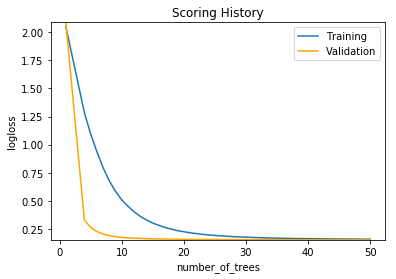

In [8]:
RF_model.plot()

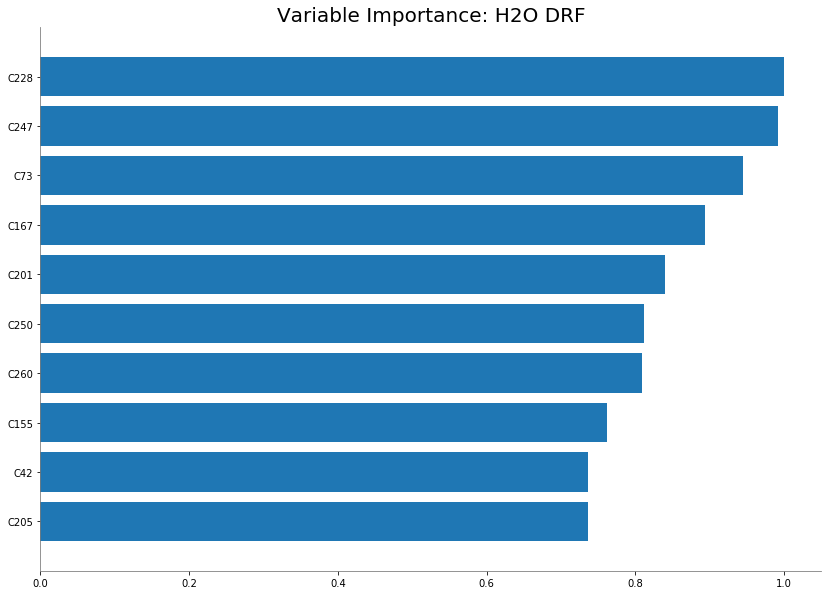

In [9]:
RF_model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%

PartialDependence: Partial Dependence Plot of model DRF_model_python_1575140688384_1 on column 'C228'


,c228,mean_response,stddev_response,std_error_mean_response
0,-0.333984,0.055685,0.116074,0.000117
1,-0.294613,0.055685,0.116074,0.000117
2,-0.255243,0.055685,0.116074,0.000117
3,-0.215872,0.055685,0.116074,0.000117
4,-0.176501,0.055685,0.116074,0.000117
5,-0.137130,0.055677,0.116074,0.000117
6,-0.097759,0.055577,0.116099,0.000117
7,-0.058388,0.055439,0.116086,0.000117
8,-0.019017,0.055342,0.116075,0.000117
9,0.020354,0.056193,0.117225,0.000118


[]

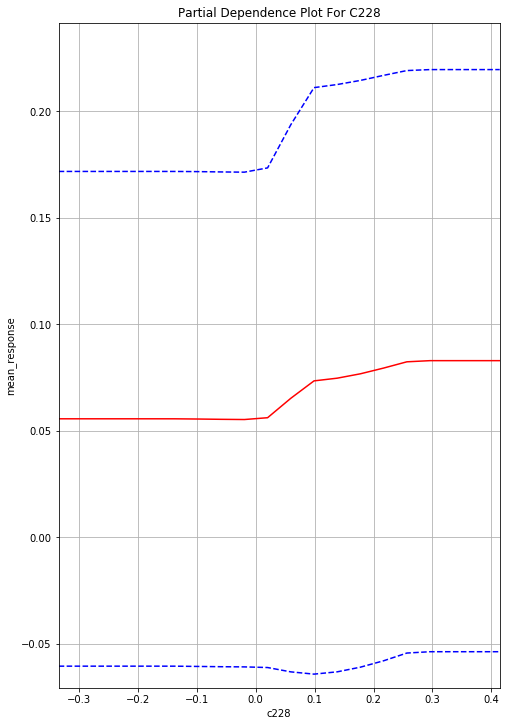

In [10]:
RF_model.partial_plot(train_questions,cols=['C228'])

In [11]:
RF_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575140688384_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,15502400.0,20.0,20.0,20.0,23400.0,26298.0,24704.48




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04388799000866611
RMSE: 0.20949460615649776
LogLoss: 0.1614105563164437
Mean Per-Class Error: 0.1924605280849958
AUC: 0.8873761733968432
pr_auc: 0.44883806444988666
Gini: 0.7747523467936863

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2394289536406732: 


,,0,1,Error,Rate
0,0,879686.0,39294.0,0.0428,(39294.0/918980.0)
1,1,29310.0,31283.0,0.4837,(29310.0/60593.0)
2,Total,908996.0,70577.0,0.07,(68604.0/979573.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.239429,0.476984,181.0
1,max f2,0.152552,0.554050,233.0
2,max f0point5,0.353682,0.502340,129.0
3,max accuracy,0.424184,0.944614,102.0
4,max precision,0.961593,1.000000,0.0
5,max recall,0.000119,1.000000,399.0
6,max specificity,0.961593,1.000000,0.0
7,max absolute_mcc,0.239429,0.441156,181.0
8,max min_per_class_accuracy,0.093558,0.806735,280.0
9,max mean_per_class_accuracy,0.102902,0.807539,272.0



Gains/Lift Table: Avg response rate:  6.19 %, avg score:  6.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.539389,11.776613,11.776613,0.728461,0.635722,0.728461,0.635722,0.117769,0.117769,1077.661333,1077.661333
1,,2,0.020001,0.441634,9.561897,10.669255,0.591466,0.486260,0.659963,0.560991,0.095622,0.213391,856.189709,966.925521
2,,3,0.030001,0.377875,7.937992,9.758834,0.491017,0.407961,0.603648,0.509981,0.079382,0.292773,693.799189,875.883410
3,,4,0.040000,0.331620,6.672885,8.987406,0.412762,0.353610,0.555930,0.470891,0.066724,0.359497,567.288518,798.740594
4,,5,0.050000,0.295439,5.804141,8.350740,0.359024,0.312703,0.516548,0.439253,0.058043,0.417540,480.414085,735.073992
5,,6,0.100001,0.191773,3.762784,6.056762,0.232753,0.236027,0.374650,0.337640,0.188141,0.605681,276.278400,505.676196
6,,7,0.150000,0.140321,2.095649,4.736409,0.129630,0.163906,0.292978,0.279730,0.104781,0.710462,109.564942,373.640908
7,,8,0.200000,0.108638,1.294530,3.875935,0.080075,0.123421,0.239752,0.240652,0.064727,0.775189,29.452972,287.593485
8,,9,0.300000,0.068655,0.842179,2.864686,0.052094,0.086039,0.177200,0.189114,0.084218,0.859406,-15.782093,186.468637
9,,10,0.400000,0.049495,0.401533,2.248900,0.024837,0.058883,0.139109,0.156557,0.040153,0.899559,-59.846724,124.889954




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04268017656197476
RMSE: 0.2065918114591543
LogLoss: 0.15519111241982708
Mean Per-Class Error: 0.17325100720878295
AUC: 0.9028659883973523
pr_auc: 0.4886302764614263
Gini: 0.8057319767947047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22816424868306986: 


,,0,1,Error,Rate
0,0,176593.0,7304.0,0.0397,(7304.0/183897.0)
1,1,5619.0,6567.0,0.4611,(5619.0/12186.0)
2,Total,182212.0,13871.0,0.0659,(12923.0/196083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.228164,0.504049,174.0
1,max f2,0.145896,0.584540,224.0
2,max f0point5,0.322143,0.531020,131.0
3,max accuracy,0.380315,0.946135,108.0
4,max precision,0.936102,1.000000,0.0
5,max recall,0.000453,1.000000,399.0
6,max specificity,0.936102,1.000000,0.0
7,max absolute_mcc,0.228164,0.470037,174.0
8,max min_per_class_accuracy,0.094227,0.826030,268.0
9,max mean_per_class_accuracy,0.092176,0.826749,270.0



Gains/Lift Table: Avg response rate:  6.21 %, avg score:  6.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.526092,12.160443,12.160443,0.755737,0.616711,0.755737,0.616711,0.121615,0.121615,1116.044251,1116.044251
1,,2,0.020002,0.427680,10.051648,11.106045,0.624681,0.473078,0.690209,0.544895,0.100525,0.222140,905.164783,1010.604517
2,,3,0.030003,0.363568,8.476206,10.229432,0.526772,0.393423,0.635730,0.494404,0.084769,0.306910,747.620588,922.943207
3,,4,0.040003,0.316179,7.187954,9.469063,0.446711,0.338830,0.588475,0.455511,0.071886,0.378795,618.795387,846.906252
4,,5,0.050004,0.280147,5.932524,8.761755,0.368689,0.297402,0.544518,0.423889,0.059330,0.438126,493.252357,776.175473
5,,6,0.100004,0.179462,3.991527,6.376762,0.248062,0.222295,0.396298,0.323097,0.199573,0.637699,299.152669,537.676234
6,,7,0.150003,0.129589,2.207485,4.987050,0.137189,0.152027,0.309931,0.266076,0.110373,0.748072,120.748495,398.705046
7,,8,0.200002,0.100657,1.250635,4.052970,0.077723,0.114041,0.251881,0.228068,0.062531,0.810602,25.063459,305.297031
8,,9,0.300001,0.065498,0.755797,2.953931,0.046971,0.081122,0.183578,0.179087,0.075579,0.886181,-24.420311,195.393119
9,,10,0.399999,0.045072,0.443138,2.326241,0.027540,0.054356,0.144569,0.147905,0.044313,0.930494,-55.686176,132.624096




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-11-30 13:05:10,0.022 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-30 13:05:15,5.924 sec,1.0,0.280654,2.050243,0.667939,0.145448,2.995822,0.098471,0.281747,2.084665,0.665819,0.145005,2.944788,0.099116
2,,2019-11-30 13:05:30,20.820 sec,4.0,0.261099,1.283553,0.714288,0.185331,3.141153,0.115913,0.226451,0.331658,0.818843,0.325332,9.739842,0.076728
3,,2019-11-30 13:05:35,25.845 sec,5.0,0.255236,1.095777,0.728718,0.199012,3.264262,0.121083,0.222326,0.265640,0.836088,0.351181,10.519357,0.082873
4,,2019-11-30 13:05:40,30.965 sec,6.0,0.250285,0.938479,0.742306,0.211982,3.393649,0.110363,0.219813,0.229301,0.846803,0.367023,10.388070,0.088034
5,,2019-11-30 13:05:45,35.787 sec,7.0,0.245346,0.796222,0.756817,0.226172,4.705244,0.108190,0.217406,0.206890,0.855073,0.386486,10.888601,0.068772
6,,2019-11-30 13:05:50,40.316 sec,8.0,0.240729,0.679533,0.769245,0.241697,6.165559,0.084767,0.215668,0.192353,0.861535,0.400857,11.085532,0.071669
7,,2019-11-30 13:05:54,45.002 sec,9.0,0.236975,0.586222,0.781516,0.255991,7.137591,0.081852,0.214700,0.183822,0.865687,0.407529,11.249640,0.075565
8,,2019-11-30 13:05:59,49.740 sec,10.0,0.233769,0.510750,0.792322,0.269661,7.956145,0.098960,0.213754,0.177336,0.869952,0.414780,11.372722,0.078559
9,,2019-11-30 13:06:04,54.648 sec,11.0,0.231289,0.454479,0.800401,0.281299,8.462791,0.096270,0.213017,0.173595,0.872806,0.421151,11.380927,0.078038



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C228,22722.087891,1.000000,0.016935
1,C247,22545.490234,0.992228,0.016803
2,C73,21467.597656,0.944790,0.016000
3,C167,20306.003906,0.893668,0.015134
4,C201,19079.255859,0.839679,0.014220
5,C250,18453.011719,0.812118,0.013753
6,C260,18367.294922,0.808345,0.013689
7,C155,17313.312500,0.761960,0.012904
8,C42,16734.935547,0.736505,0.012473
9,C205,16715.939453,0.735669,0.012458



See the whole table with table.as_data_frame()


drf Model Build progress: |███████████████████████████████████████████████| 100%


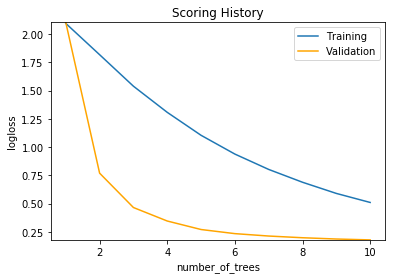

In [12]:
#10 trees
RF10_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',ntrees=10)
RF10_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF10_model.plot()

drf Model Build progress: |███████████████████████████████████████████████| 100%


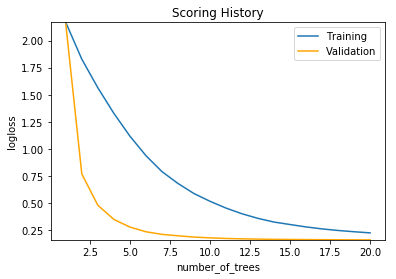

In [13]:
#20 trees
RF20_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',ntrees=20)
RF20_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF20_model.plot()

drf Model Build progress: |███████████████████████████████████████████████| 100%


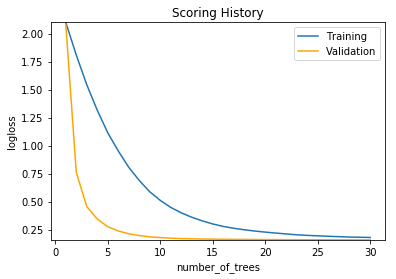

In [15]:
#30 trees
RF30_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',ntrees=30)
RF30_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF30_model.plot()

drf Model Build progress: |███████████████████████████████████████████████| 100%


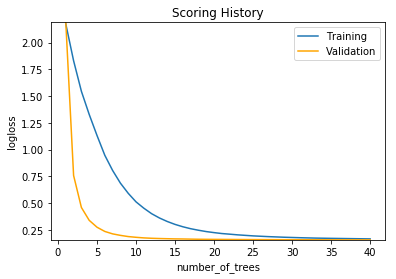

In [14]:
#40 trees
RF40_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',ntrees=40)
RF40_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF40_model.plot()

In [54]:
#model_path = RF10_model.download_mojo(get_genmodel_jar=True)
!wget -c http://h2o-release.s3.amazonaws.com/h2o/rel-xia/2/h2o-3.22.0.2.zip
!unzip -n h2o-3.26.0.10.zip 

!java -cp h2o-3.26.0.10/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i $model_path -o model.gv -f 20 -d 3
!dot -Tpng model.gv -o model.png

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
Error: Could not find or load main class hex.genmodel.tools.PrintMojo
'dot' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
#print(RF10_model)
#print(RF20_model)
#print(RF30_model)
#print(RF40_model)
print(RF_model)

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575140688384_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,15502400.0,20.0,20.0,20.0,23400.0,26298.0,24704.48




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.04388799000866611
RMSE: 0.20949460615649776
LogLoss: 0.1614105563164437
Mean Per-Class Error: 0.1924605280849958
AUC: 0.8873761733968432
pr_auc: 0.44883806444988666
Gini: 0.7747523467936863

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2394289536406732: 


,,0,1,Error,Rate
0,0,879686.0,39294.0,0.0428,(39294.0/918980.0)
1,1,29310.0,31283.0,0.4837,(29310.0/60593.0)
2,Total,908996.0,70577.0,0.07,(68604.0/979573.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.239429,0.476984,181.0
1,max f2,0.152552,0.554050,233.0
2,max f0point5,0.353682,0.502340,129.0
3,max accuracy,0.424184,0.944614,102.0
4,max precision,0.961593,1.000000,0.0
5,max recall,0.000119,1.000000,399.0
6,max specificity,0.961593,1.000000,0.0
7,max absolute_mcc,0.239429,0.441156,181.0
8,max min_per_class_accuracy,0.093558,0.806735,280.0
9,max mean_per_class_accuracy,0.102902,0.807539,272.0



Gains/Lift Table: Avg response rate:  6.19 %, avg score:  6.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.539389,11.776613,11.776613,0.728461,0.635722,0.728461,0.635722,0.117769,0.117769,1077.661333,1077.661333
1,,2,0.020001,0.441634,9.561897,10.669255,0.591466,0.486260,0.659963,0.560991,0.095622,0.213391,856.189709,966.925521
2,,3,0.030001,0.377875,7.937992,9.758834,0.491017,0.407961,0.603648,0.509981,0.079382,0.292773,693.799189,875.883410
3,,4,0.040000,0.331620,6.672885,8.987406,0.412762,0.353610,0.555930,0.470891,0.066724,0.359497,567.288518,798.740594
4,,5,0.050000,0.295439,5.804141,8.350740,0.359024,0.312703,0.516548,0.439253,0.058043,0.417540,480.414085,735.073992
5,,6,0.100001,0.191773,3.762784,6.056762,0.232753,0.236027,0.374650,0.337640,0.188141,0.605681,276.278400,505.676196
6,,7,0.150000,0.140321,2.095649,4.736409,0.129630,0.163906,0.292978,0.279730,0.104781,0.710462,109.564942,373.640908
7,,8,0.200000,0.108638,1.294530,3.875935,0.080075,0.123421,0.239752,0.240652,0.064727,0.775189,29.452972,287.593485
8,,9,0.300000,0.068655,0.842179,2.864686,0.052094,0.086039,0.177200,0.189114,0.084218,0.859406,-15.782093,186.468637
9,,10,0.400000,0.049495,0.401533,2.248900,0.024837,0.058883,0.139109,0.156557,0.040153,0.899559,-59.846724,124.889954




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04268017656197476
RMSE: 0.2065918114591543
LogLoss: 0.15519111241982708
Mean Per-Class Error: 0.17325100720878295
AUC: 0.9028659883973523
pr_auc: 0.4886302764614263
Gini: 0.8057319767947047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22816424868306986: 


,,0,1,Error,Rate
0,0,176593.0,7304.0,0.0397,(7304.0/183897.0)
1,1,5619.0,6567.0,0.4611,(5619.0/12186.0)
2,Total,182212.0,13871.0,0.0659,(12923.0/196083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.228164,0.504049,174.0
1,max f2,0.145896,0.584540,224.0
2,max f0point5,0.322143,0.531020,131.0
3,max accuracy,0.380315,0.946135,108.0
4,max precision,0.936102,1.000000,0.0
5,max recall,0.000453,1.000000,399.0
6,max specificity,0.936102,1.000000,0.0
7,max absolute_mcc,0.228164,0.470037,174.0
8,max min_per_class_accuracy,0.094227,0.826030,268.0
9,max mean_per_class_accuracy,0.092176,0.826749,270.0



Gains/Lift Table: Avg response rate:  6.21 %, avg score:  6.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.526092,12.160443,12.160443,0.755737,0.616711,0.755737,0.616711,0.121615,0.121615,1116.044251,1116.044251
1,,2,0.020002,0.427680,10.051648,11.106045,0.624681,0.473078,0.690209,0.544895,0.100525,0.222140,905.164783,1010.604517
2,,3,0.030003,0.363568,8.476206,10.229432,0.526772,0.393423,0.635730,0.494404,0.084769,0.306910,747.620588,922.943207
3,,4,0.040003,0.316179,7.187954,9.469063,0.446711,0.338830,0.588475,0.455511,0.071886,0.378795,618.795387,846.906252
4,,5,0.050004,0.280147,5.932524,8.761755,0.368689,0.297402,0.544518,0.423889,0.059330,0.438126,493.252357,776.175473
5,,6,0.100004,0.179462,3.991527,6.376762,0.248062,0.222295,0.396298,0.323097,0.199573,0.637699,299.152669,537.676234
6,,7,0.150003,0.129589,2.207485,4.987050,0.137189,0.152027,0.309931,0.266076,0.110373,0.748072,120.748495,398.705046
7,,8,0.200002,0.100657,1.250635,4.052970,0.077723,0.114041,0.251881,0.228068,0.062531,0.810602,25.063459,305.297031
8,,9,0.300001,0.065498,0.755797,2.953931,0.046971,0.081122,0.183578,0.179087,0.075579,0.886181,-24.420311,195.393119
9,,10,0.399999,0.045072,0.443138,2.326241,0.027540,0.054356,0.144569,0.147905,0.044313,0.930494,-55.686176,132.624096




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-11-30 13:05:10,0.022 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-30 13:05:15,5.924 sec,1.0,0.280654,2.050243,0.667939,0.145448,2.995822,0.098471,0.281747,2.084665,0.665819,0.145005,2.944788,0.099116
2,,2019-11-30 13:05:30,20.820 sec,4.0,0.261099,1.283553,0.714288,0.185331,3.141153,0.115913,0.226451,0.331658,0.818843,0.325332,9.739842,0.076728
3,,2019-11-30 13:05:35,25.845 sec,5.0,0.255236,1.095777,0.728718,0.199012,3.264262,0.121083,0.222326,0.265640,0.836088,0.351181,10.519357,0.082873
4,,2019-11-30 13:05:40,30.965 sec,6.0,0.250285,0.938479,0.742306,0.211982,3.393649,0.110363,0.219813,0.229301,0.846803,0.367023,10.388070,0.088034
5,,2019-11-30 13:05:45,35.787 sec,7.0,0.245346,0.796222,0.756817,0.226172,4.705244,0.108190,0.217406,0.206890,0.855073,0.386486,10.888601,0.068772
6,,2019-11-30 13:05:50,40.316 sec,8.0,0.240729,0.679533,0.769245,0.241697,6.165559,0.084767,0.215668,0.192353,0.861535,0.400857,11.085532,0.071669
7,,2019-11-30 13:05:54,45.002 sec,9.0,0.236975,0.586222,0.781516,0.255991,7.137591,0.081852,0.214700,0.183822,0.865687,0.407529,11.249640,0.075565
8,,2019-11-30 13:05:59,49.740 sec,10.0,0.233769,0.510750,0.792322,0.269661,7.956145,0.098960,0.213754,0.177336,0.869952,0.414780,11.372722,0.078559
9,,2019-11-30 13:06:04,54.648 sec,11.0,0.231289,0.454479,0.800401,0.281299,8.462791,0.096270,0.213017,0.173595,0.872806,0.421151,11.380927,0.078038



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C228,22722.087891,1.000000,0.016935
1,C247,22545.490234,0.992228,0.016803
2,C73,21467.597656,0.944790,0.016000
3,C167,20306.003906,0.893668,0.015134
4,C201,19079.255859,0.839679,0.014220
5,C250,18453.011719,0.812118,0.013753
6,C260,18367.294922,0.808345,0.013689
7,C155,17313.312500,0.761960,0.012904
8,C42,16734.935547,0.736505,0.012473
9,C205,16715.939453,0.735669,0.012458



See the whole table with table.as_data_frame()



In [20]:
RF10_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575140688384_73


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,10.0,3111458.0,20.0,20.0,20.0,23988.0,26066.0,24794.3




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.054539544251485245
RMSE: 0.2335370297222375
LogLoss: 0.5101047972949517
Mean Per-Class Error: 0.24261719411613158
AUC: 0.7924047492703945
pr_auc: 0.27025616805726255
Gini: 0.584809498540789

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2644996426234911: 


,,0,1,Error,Rate
0,0,845581.0,64066.0,0.0704,(64066.0/909647.0)
1,1,32546.0,27429.0,0.5427,(32546.0/59975.0)
2,Total,878127.0,91495.0,0.0996,(96612.0/969622.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.264500,0.362171,209.0
1,max f2,0.063897,0.464983,317.0
2,max f0point5,0.510739,0.367537,110.0
3,max accuracy,0.679925,0.938328,60.0
4,max precision,0.679925,0.507951,60.0
5,max recall,0.000005,1.000000,399.0
6,max specificity,0.999986,0.997517,0.0
7,max absolute_mcc,0.264500,0.318827,209.0
8,max min_per_class_accuracy,0.024825,0.753581,352.0
9,max mean_per_class_accuracy,0.035087,0.757383,341.0



Gains/Lift Table: Avg response rate:  6.19 %, avg score:  6.75 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.704453,8.067543,8.067543,0.499030,0.863251,0.499030,0.863251,0.080686,0.080686,706.754284,706.754284
1,,2,0.020004,0.566667,7.471079,7.769296,0.462135,0.634770,0.480582,0.749005,0.074728,0.155414,647.107909,676.929574
2,,3,0.036967,0.500000,4.036502,6.056387,0.249684,0.512179,0.374627,0.640330,0.068473,0.223887,303.650194,505.638747
3,,4,0.040008,0.464286,7.532399,6.168583,0.465928,0.481277,0.381567,0.628240,0.022907,0.246794,653.239894,516.858257
4,,5,0.050002,0.399061,5.571559,6.049253,0.344637,0.423713,0.374186,0.587361,0.055683,0.302477,457.155905,504.925343
5,,6,0.100007,0.252315,3.287217,4.668207,0.203336,0.318062,0.288759,0.452709,0.164375,0.466853,228.721651,366.820678
6,,7,0.150002,0.171053,2.075024,3.803907,0.128354,0.217382,0.235297,0.374275,0.103741,0.570594,107.502413,280.390668
7,,8,0.200000,0.067313,1.960689,3.343119,0.121281,0.119304,0.206794,0.310534,0.098031,0.668625,96.068857,234.311862
8,,9,0.300061,0.018293,0.954974,2.546748,0.059071,0.034673,0.157533,0.218543,0.095556,0.764181,-4.502609,154.674810
9,,10,0.400000,0.007318,0.487980,2.032373,0.030185,0.011895,0.125716,0.166913,0.048768,0.812949,-51.201952,103.237276




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.045731131272128495
RMSE: 0.21384838384268537
LogLoss: 0.17898878116561193
Mean Per-Class Error: 0.208979042110216
AUC: 0.8695848868924168
pr_auc: 0.41338795118204386
Gini: 0.7391697737848335

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23569206952572214: 


,,0,1,Error,Rate
0,0,174555.0,9342.0,0.0508,(9342.0/183897.0)
1,1,5883.0,6303.0,0.4828,(5883.0/12186.0)
2,Total,180438.0,15645.0,0.0776,(15225.0/196083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.235692,0.452948,191.0
1,max f2,0.127653,0.529047,260.0
2,max f0point5,0.357234,0.478912,135.0
3,max accuracy,0.440389,0.943243,105.0
4,max precision,0.991791,1.000000,0.0
5,max recall,0.000018,1.000000,399.0
6,max specificity,0.991791,1.000000,0.0
7,max absolute_mcc,0.228105,0.415821,195.0
8,max min_per_class_accuracy,0.101592,0.776137,287.0
9,max mean_per_class_accuracy,0.114219,0.791021,271.0



Gains/Lift Table: Avg response rate:  6.21 %, avg score:  6.87 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.570085,11.257846,11.257846,0.699643,0.666335,0.699643,0.666335,0.112588,0.112588,1025.784557,1025.784557
1,,2,0.020002,0.471972,9.058791,10.158318,0.562978,0.516640,0.631311,0.591487,0.090596,0.203184,805.879118,915.831838
2,,3,0.030003,0.402282,7.516171,9.277603,0.467109,0.433534,0.576577,0.538836,0.075168,0.278352,651.617095,827.760257
3,,4,0.040003,0.351030,6.392027,8.556209,0.397246,0.377703,0.531744,0.498553,0.063926,0.342278,539.202748,755.620879
4,,5,0.050004,0.312528,5.415582,7.928083,0.336563,0.330338,0.492708,0.464910,0.054161,0.396439,441.558169,692.808337
5,,6,0.100004,0.206118,3.426936,5.677624,0.212974,0.252413,0.352848,0.358667,0.171344,0.567783,242.693574,467.762433
6,,7,0.150003,0.142841,2.158247,4.504539,0.134129,0.180390,0.279944,0.299243,0.107911,0.675693,115.824736,350.453856
7,,8,0.200002,0.110304,1.388500,3.725549,0.086291,0.122534,0.231532,0.255067,0.069424,0.745117,38.849983,272.554874
8,,9,0.300001,0.082561,0.622855,2.691335,0.038709,0.101850,0.167259,0.203996,0.062285,0.807402,-37.714458,169.133521
9,,10,0.399999,0.022440,0.917460,2.247872,0.057018,0.044134,0.139699,0.164031,0.091745,0.899147,-8.253971,124.787214




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-11-30 13:10:19,0.009 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-11-30 13:10:23,4.332 sec,1.0,0.282402,2.093490,0.653340,0.139547,2.971371,0.099976,0.282856,2.101906,0.653511,0.140093,3.007163,0.095674
2,,2019-11-30 13:10:28,8.943 sec,2.0,0.275280,1.816696,0.667941,0.150988,3.235816,0.102785,0.247556,0.769117,0.734374,0.229628,7.528743,0.121255
3,,2019-11-30 13:10:32,13.429 sec,3.0,0.267996,1.538172,0.685705,0.168699,3.201303,0.108839,0.233833,0.465230,0.783944,0.288170,9.624966,0.070628
4,,2019-11-30 13:10:36,17.940 sec,4.0,0.261148,1.306919,0.707590,0.184754,3.258674,0.114943,0.226821,0.345923,0.812688,0.324560,9.452652,0.075993
5,,2019-11-30 13:10:41,22.621 sec,5.0,0.255105,1.103917,0.721966,0.198354,3.373210,0.124234,0.222440,0.270768,0.832790,0.350809,10.461919,0.079222
6,,2019-11-30 13:10:46,27.288 sec,6.0,0.249725,0.937889,0.738582,0.213147,3.403461,0.109420,0.219474,0.234358,0.845067,0.370423,10.543973,0.089131
7,,2019-11-30 13:10:51,32.026 sec,7.0,0.245012,0.802067,0.753607,0.226829,4.855213,0.108408,0.217600,0.213113,0.853217,0.383684,10.839369,0.068247
8,,2019-11-30 13:10:55,36.811 sec,8.0,0.240804,0.688717,0.766571,0.240963,6.215068,0.085111,0.216127,0.198051,0.859218,0.395983,10.913218,0.071036
9,,2019-11-30 13:11:00,41.539 sec,9.0,0.236887,0.589917,0.780123,0.255561,7.210205,0.103247,0.214891,0.186734,0.864962,0.405244,11.282462,0.074127



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C247,6228.431152,1.000000,0.023091
1,C228,6160.128418,0.989034,0.022837
2,C73,4818.913574,0.773696,0.017865
3,C201,3962.210449,0.636149,0.014689
4,C42,3307.775635,0.531077,0.012263
5,C115,3121.907715,0.501235,0.011574
6,C260,3062.668457,0.491724,0.011354
7,C250,3005.953369,0.482618,0.011144
8,C24,2800.799805,0.449680,0.010383
9,C155,2748.547607,0.441291,0.010190



See the whole table with table.as_data_frame()


### Balance classes

In [22]:
h2o.init(min_mem_size='29G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,17 mins 39 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_Lanier_0wkxwo
H2O cluster total nodes:,1
H2O cluster free memory:,23.04 Gb
H2O cluster total cores:,16
H2O cluster allowed cores:,16
H2O cluster status:,"locked, healthy"


In [23]:

train_questions=h2o.import_file("train_google_news.csv") 

#rename target column
train_questions['target']=train_questions['C302']
train_questions=train_questions.drop(['C302'])
train_questions=train_questions.drop(['C1'])
#convert target to category
train_questions['target']=train_questions['target'].ascharacter().asfactor()
x=train_questions.columns
y='target'
x.remove(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
train_questions, valid,test=train_questions.split_frame(ratios=[.75,.15])


In [32]:
RF10_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',balance_classes=True,ntrees=10)
RF20_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',balance_classes=True,ntrees=20)
RF30_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',balance_classes=True,ntrees=30)
RF40_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',balance_classes=True,ntrees=40)
RF50_model = H2ORandomForestEstimator(validation_frame=valid,stopping_metric='misclassification',balance_classes=True,ntrees=50)

drf Model Build progress: |███████████████████████████████████████████████| 100%


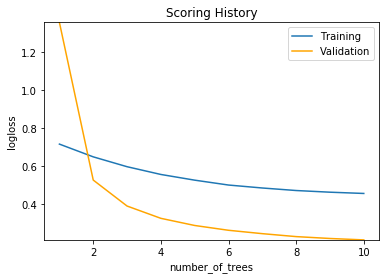

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575233987582_107


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,10.0,2830906.0,20.0,20.0,20.0,22074.0,23295.0,22573.3




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1641185909016008
RMSE: 0.4051155278455774
LogLoss: 0.4563902062974377
Mean Per-Class Error: 0.022069904475825686
AUC: 0.9880775648747679
pr_auc: 0.9496145568810473
Gini: 0.9761551297495359

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13786698889043045: 


,,0,1,Error,Rate
0,0,877982.0,32135.0,0.0353,(32135.0/910117.0)
1,1,8050.0,902026.0,0.0088,(8050.0/910076.0)
2,Total,886032.0,934161.0,0.0221,(40185.0/1820193.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.137867,0.978211,331.0
1,max f2,0.105932,0.988046,341.0
2,max f0point5,0.168507,0.972208,321.0
3,max accuracy,0.141287,0.977930,330.0
4,max precision,0.594028,0.982885,99.0
5,max recall,0.000009,1.000000,399.0
6,max specificity,1.000000,0.998866,0.0
7,max absolute_mcc,0.137867,0.956180,331.0
8,max min_per_class_accuracy,0.195215,0.971128,312.0
9,max mean_per_class_accuracy,0.141287,0.977930,330.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 23.81 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.015131,1.000000,1.925724,1.925724,0.962891,1.000000,0.962891,1.000000,0.029138,0.029138,92.572447,92.572447
1,,2,0.020008,0.848126,1.990569,1.941529,0.995314,0.900455,0.970794,0.975737,0.009707,0.038845,99.056857,94.152948
2,,3,0.030000,0.730385,1.984151,1.955726,0.992105,0.782108,0.977892,0.911242,0.019827,0.058672,98.415058,95.572595
3,,4,0.040008,0.672264,1.981674,1.962217,0.990867,0.697431,0.981138,0.857758,0.019832,0.078505,98.167387,96.221672
4,,5,0.050000,0.646873,1.970537,1.963880,0.985298,0.659645,0.981969,0.818167,0.019690,0.098194,97.053728,96.387951
5,,6,0.100000,0.564961,1.967079,1.965479,0.983569,0.600888,0.982769,0.709527,0.098354,0.196549,96.707861,96.547906
6,,7,0.150082,0.514429,1.961396,1.964116,0.980727,0.538485,0.982088,0.652452,0.098229,0.294778,96.139578,96.411650
7,,8,0.200000,0.474792,1.954251,1.961654,0.977155,0.494090,0.980856,0.612926,0.097553,0.392331,95.425115,96.165418
8,,9,0.300000,0.405999,1.950517,1.957942,0.975288,0.439729,0.979000,0.555194,0.195051,0.587383,95.051700,95.794179
9,,10,0.400001,0.334932,1.936775,1.952650,0.968416,0.371678,0.976354,0.509314,0.193679,0.781062,93.677453,95.264994




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04663188714325001
RMSE: 0.21594417598826326
LogLoss: 0.21160234208069661
Mean Per-Class Error: 0.15779673187793164
AUC: 0.9082269229837457
pr_auc: 0.49397482743638244
Gini: 0.8164538459674915

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07280288627914602: 


,,0,1,Error,Rate
0,0,175667.0,7923.0,0.0432,(7923.0/183590.0)
1,1,5010.0,7057.0,0.4152,(5010.0/12067.0)
2,Total,180677.0,14980.0,0.0661,(12933.0/195657.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.072803,0.521832,264.0
1,max f2,0.037776,0.608655,307.0
2,max f0point5,0.143819,0.532594,207.0
3,max accuracy,0.222688,0.946519,163.0
4,max precision,0.913576,1.000000,0.0
5,max recall,0.000002,1.000000,399.0
6,max specificity,0.913576,1.000000,0.0
7,max absolute_mcc,0.065237,0.490069,273.0
8,max min_per_class_accuracy,0.023008,0.841468,335.0
9,max mean_per_class_accuracy,0.023008,0.842203,335.0



Gains/Lift Table: Avg response rate:  6.17 %, avg score:  2.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.448179,11.864468,11.864468,0.731732,0.530073,0.731732,0.530073,0.118671,0.118671,1086.446801,1086.446801
1,,2,0.020004,0.262872,10.223990,11.044229,0.630557,0.353713,0.681145,0.441893,0.102262,0.220933,922.398989,1004.422895
2,,3,0.030001,0.206879,8.687374,10.258878,0.535787,0.234567,0.632709,0.372808,0.086848,0.307782,768.737382,925.887825
3,,4,0.040004,0.150462,7.415293,9.547891,0.457333,0.171315,0.588859,0.322428,0.074169,0.381951,641.529251,854.789099
4,,5,0.050001,0.118335,6.241978,8.886911,0.384969,0.136457,0.548094,0.285245,0.062402,0.444352,524.197756,788.691106
5,,6,0.100002,0.052208,4.484890,6.685901,0.276602,0.078660,0.412348,0.181953,0.224248,0.668600,348.489021,568.590063
6,,7,0.150002,0.033089,2.214270,5.195357,0.136563,0.041247,0.320420,0.135051,0.110715,0.779315,121.426952,419.535693
7,,8,0.200003,0.022757,1.252985,4.209764,0.077277,0.026471,0.259634,0.107906,0.062650,0.841966,25.298485,320.976391
8,,9,0.299999,0.013384,0.631497,3.017049,0.038947,0.016639,0.186074,0.077485,0.063147,0.905113,-36.850314,201.704887
9,,10,0.413177,0.007290,0.274581,2.265831,0.016935,0.009116,0.139743,0.058757,0.031076,0.936190,-72.541850,126.583108




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-12-01 15:27:05,0.015 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-01 15:27:38,32.854 sec,1.0,0.409367,0.716495,0.950167,0.763743,1.816660,0.072471,0.258547,1.357779,0.764448,0.215153,1.098695,0.112222
2,,2019-12-01 15:27:44,38.817 sec,2.0,0.406040,0.649349,0.957494,0.796514,1.830788,0.061456,0.217891,0.526983,0.829840,0.346063,8.959407,0.071344
3,,2019-12-01 15:27:50,44.509 sec,3.0,0.403959,0.597382,0.963871,0.826096,1.844471,0.054233,0.215076,0.390101,0.858869,0.409611,10.737675,0.080861
4,,2019-12-01 15:27:56,50.485 sec,4.0,0.402351,0.556509,0.969545,0.853212,1.855581,0.046318,0.215030,0.325263,0.875465,0.438813,11.259645,0.067828
5,,2019-12-01 15:28:02,56.363 sec,5.0,0.402786,0.526483,0.974140,0.877116,1.867221,0.040294,0.214940,0.287582,0.884689,0.458044,11.508203,0.072520
6,,2019-12-01 15:28:08,1 min 2.253 sec,6.0,0.402341,0.500763,0.978254,0.896435,1.882755,0.035105,0.215370,0.262269,0.892506,0.468675,11.624196,0.069259
7,,2019-12-01 15:28:14,1 min 8.248 sec,7.0,0.403093,0.485166,0.981345,0.912895,1.893020,0.031182,0.215498,0.244455,0.898001,0.477102,11.765045,0.064332
8,,2019-12-01 15:28:20,1 min 14.267 sec,8.0,0.403226,0.471860,0.984040,0.927551,1.902609,0.027439,0.215744,0.228932,0.902609,0.483274,11.831327,0.067767
9,,2019-12-01 15:28:25,1 min 20.056 sec,9.0,0.404222,0.463036,0.986237,0.939792,1.913423,0.024580,0.215816,0.219009,0.905933,0.489882,11.856183,0.064971



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C228,193589.437500,1.000000,0.076849
1,C205,63763.113281,0.329373,0.025312
2,C247,62954.910156,0.325198,0.024991
3,C144,60304.722656,0.311508,0.023939
4,C104,53916.839844,0.278511,0.021403
5,C131,49738.171875,0.256926,0.019744
6,C73,44440.914062,0.229563,0.017642
7,C24,41344.480469,0.213568,0.016412
8,C201,39526.808594,0.204179,0.015691
9,C63,37543.980469,0.193936,0.014904



See the whole table with table.as_data_frame()


In [33]:
RF10_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF10_model.plot()
RF10_model

drf Model Build progress: |███████████████████████████████████████████████| 100%


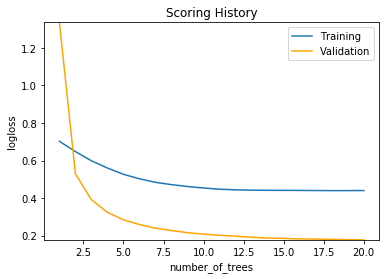

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575233987582_129


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,20.0,20.0,5670390.0,20.0,20.0,20.0,21960.0,23517.0,22605.65




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16590038123424622
RMSE: 0.40730870508036804
LogLoss: 0.44021830253758987
Mean Per-Class Error: 0.011448185626747875
AUC: 0.9949812849631149
pr_auc: 0.9863680871114359
Gini: 0.9899625699262298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1627812763006062: 


,,0,1,Error,Rate
0,0,902145.0,16706.0,0.0182,(16706.0/918851.0)
1,1,4332.0,914444.0,0.0047,(4332.0/918776.0)
2,Total,906477.0,931150.0,0.0114,(21038.0/1837627.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.162781,0.988628,321.0
1,max f2,0.131969,0.993887,330.0
2,max f0point5,0.204605,0.986437,308.0
3,max accuracy,0.162781,0.988552,321.0
4,max precision,0.703672,0.998787,54.0
5,max recall,0.001799,1.000000,396.0
6,max specificity,0.999987,0.999981,0.0
7,max absolute_mcc,0.162781,0.977192,321.0
8,max min_per_class_accuracy,0.199471,0.986323,310.0
9,max mean_per_class_accuracy,0.162781,0.988552,321.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 22.88 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.762577,1.997493,1.997493,0.998694,0.885093,0.998694,0.885093,0.019976,0.019976,99.749267,99.749267
1,,2,0.020001,0.666690,1.996731,1.997112,0.998313,0.707063,0.998504,0.796080,0.019967,0.039943,99.673070,99.711169
2,,3,0.030001,0.632725,1.987698,1.993974,0.993797,0.648083,0.996935,0.746749,0.019877,0.059820,98.769769,99.397375
3,,4,0.040001,0.610185,1.983889,1.991452,0.991892,0.620942,0.995674,0.715297,0.019839,0.079659,98.388859,99.145250
4,,5,0.050000,0.591831,1.981821,1.989526,0.990859,0.600687,0.994711,0.692376,0.019818,0.099477,98.182079,98.952618
5,,6,0.100000,0.531341,1.978991,1.984259,0.989444,0.558811,0.992078,0.625593,0.098949,0.198427,97.899118,98.425870
6,,7,0.150000,0.491313,1.978382,1.982300,0.989139,0.510389,0.991098,0.587192,0.098919,0.297346,97.838172,98.229972
7,,8,0.200000,0.459128,1.979274,1.981543,0.989585,0.474794,0.990720,0.559093,0.098964,0.396309,97.927414,98.154332
8,,9,0.300000,0.403454,1.979655,1.980914,0.989776,0.430929,0.990405,0.516372,0.197965,0.594275,97.965505,98.091390
9,,10,0.400000,0.343584,1.979339,1.980520,0.989618,0.374742,0.990208,0.480964,0.197934,0.792208,97.933944,98.052028




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.046950413278231316
RMSE: 0.21668044046067314
LogLoss: 0.1774843231132404
Mean Per-Class Error: 0.14770166301858767
AUC: 0.9217222690857538
pr_auc: 0.5126898819694893
Gini: 0.8434445381715077

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06522358582757118: 


,,0,1,Error,Rate
0,0,175136.0,8454.0,0.046,(8454.0/183590.0)
1,1,4616.0,7451.0,0.3825,(4616.0/12067.0)
2,Total,179752.0,15905.0,0.0668,(13070.0/195657.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.065224,0.532747,268.0
1,max f2,0.036704,0.625221,305.0
2,max f0point5,0.130944,0.549316,212.0
3,max accuracy,0.153723,0.947285,198.0
4,max precision,0.652812,0.875000,4.0
5,max recall,0.000008,1.000000,399.0
6,max specificity,0.878746,0.999995,0.0
7,max absolute_mcc,0.065224,0.503010,268.0
8,max min_per_class_accuracy,0.022143,0.850504,331.0
9,max mean_per_class_accuracy,0.022643,0.852298,330.0



Gains/Lift Table: Avg response rate:  6.17 %, avg score:  2.39 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.387219,11.930750,11.930750,0.735820,0.508544,0.735820,0.508544,0.119334,0.119334,1093.074996,1093.074996
1,,2,0.020004,0.252516,10.348269,11.139509,0.638222,0.313006,0.687021,0.410775,0.103505,0.222839,934.826854,1013.950925
2,,3,0.030001,0.183022,9.110137,10.463282,0.561861,0.214665,0.645315,0.345427,0.091075,0.313914,811.013724,946.328239
3,,4,0.040004,0.140289,7.953833,9.835840,0.490547,0.159950,0.606618,0.299052,0.079556,0.393470,695.383330,883.583997
4,,5,0.050001,0.111818,6.731057,9.215074,0.415133,0.125134,0.568333,0.264279,0.067291,0.460761,573.105681,821.507375
5,,6,0.100002,0.050408,4.479918,6.847496,0.276296,0.074639,0.422314,0.169459,0.223999,0.684760,347.991805,584.749590
6,,7,0.150002,0.029886,2.242445,5.312479,0.138301,0.038625,0.327643,0.125848,0.112124,0.796884,124.244511,431.247897
7,,8,0.200003,0.020562,1.279503,4.304235,0.078912,0.024900,0.265460,0.100611,0.063976,0.860860,27.950305,330.423499
8,,9,0.299999,0.011352,0.631497,3.080031,0.038947,0.015447,0.189959,0.072224,0.063147,0.924008,-36.850314,208.003066
9,,10,0.400001,0.007097,0.293358,2.383353,0.018093,0.009196,0.146992,0.056467,0.029336,0.953344,-70.664244,138.335349




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-12-01 15:28:38,0.016 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-01 15:28:58,19.608 sec,1.0,0.407394,0.702429,0.950773,0.770006,1.815570,0.070620,0.256840,1.335011,0.765491,0.219883,1.049581,0.106855
2,,2019-12-01 15:29:04,25.609 sec,2.0,0.406405,0.647571,0.957240,0.801296,1.826593,0.061547,0.217073,0.528696,0.828355,0.350634,9.529124,0.073772
3,,2019-12-01 15:29:10,31.587 sec,3.0,0.404366,0.598576,0.963559,0.827257,1.841460,0.053978,0.214834,0.390910,0.858172,0.410057,10.812242,0.078929
4,,2019-12-01 15:29:16,37.297 sec,4.0,0.404587,0.559954,0.968924,0.853398,1.854734,0.046962,0.214945,0.324058,0.874835,0.436622,11.226504,0.071891
5,,2019-12-01 15:29:21,43.118 sec,5.0,0.404243,0.526451,0.973892,0.877179,1.870425,0.040728,0.215207,0.284301,0.885246,0.452851,11.367353,0.072985
6,,2019-12-01 15:29:27,48.816 sec,6.0,0.404287,0.502847,0.977948,0.897009,1.883738,0.035580,0.215213,0.259281,0.892590,0.465069,11.425350,0.067496
7,,2019-12-01 15:29:33,54.688 sec,7.0,0.403998,0.483684,0.981368,0.914191,1.897570,0.031177,0.215513,0.239771,0.898000,0.472183,11.624196,0.065155
8,,2019-12-01 15:29:39,1 min 0.472 sec,8.0,0.404513,0.471689,0.984017,0.927931,1.908514,0.027512,0.215721,0.227211,0.902069,0.478351,11.541344,0.065119
9,,2019-12-01 15:29:45,1 min 6.224 sec,9.0,0.404860,0.461666,0.986298,0.939917,1.921275,0.024356,0.215806,0.215919,0.905821,0.484335,11.649052,0.065743



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C247,203677.031250,1.000000,0.040546
1,C228,189059.859375,0.928234,0.037636
2,C73,177964.265625,0.873757,0.035427
3,C24,166899.718750,0.819433,0.033225
4,C131,114092.750000,0.560165,0.022712
5,C201,107547.390625,0.528029,0.021409
6,C155,104241.421875,0.511798,0.020751
7,C115,99310.164062,0.487586,0.019770
8,C205,84832.453125,0.416505,0.016888
9,C260,84144.015625,0.413125,0.016751



See the whole table with table.as_data_frame()


In [34]:
RF20_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF20_model.plot()
RF20_model

drf Model Build progress: |███████████████████████████████████████████████| 100%


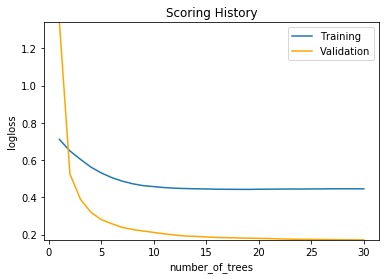

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575233987582_171


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,8464800.0,20.0,20.0,20.0,21851.0,23395.0,22498.133




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16898193204124784
RMSE: 0.41107411988745757
LogLoss: 0.4458534762693932
Mean Per-Class Error: 0.008756314006945543
AUC: 0.996367745583636
pr_auc: 0.9918273465213692
Gini: 0.9927354911672721

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.174206700749596: 


,,0,1,Error,Rate
0,0,905707.0,13240.0,0.0144,(13240.0/918947.0)
1,1,2853.0,916037.0,0.0031,(2853.0/918890.0)
2,Total,908560.0,929277.0,0.0088,(16093.0/1837837.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.174207,0.991292,315.0
1,max f2,0.149677,0.995429,322.0
2,max f0point5,0.208232,0.989075,305.0
3,max accuracy,0.174207,0.991244,315.0
4,max precision,0.727136,0.999433,44.0
5,max recall,0.001638,1.000000,396.0
6,max specificity,0.999952,0.999998,0.0
7,max absolute_mcc,0.174207,0.982550,315.0
8,max min_per_class_accuracy,0.211212,0.988942,304.0
9,max mean_per_class_accuracy,0.174207,0.991244,315.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 22.40 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.705895,1.998758,1.998758,0.999347,0.818796,0.999347,0.818796,0.019988,0.019988,99.875833,99.875833
1,,2,0.020000,0.638943,1.993534,1.996146,0.996735,0.664691,0.998041,0.741745,0.019935,0.039923,99.353445,99.614646
2,,3,0.030000,0.610030,1.987441,1.993244,0.993688,0.623342,0.996590,0.702277,0.019875,0.059798,98.744070,99.324449
3,,4,0.040000,0.589328,1.983413,1.990787,0.991675,0.599164,0.995361,0.676499,0.019834,0.079632,98.341333,99.078677
4,,5,0.050000,0.572767,1.983631,1.989356,0.991784,0.580790,0.994646,0.657358,0.019836,0.099468,98.363099,98.935564
5,,6,0.100000,0.516860,1.982870,1.986113,0.991403,0.542276,0.993024,0.599817,0.099144,0.198611,98.286956,98.611260
6,,7,0.150000,0.479579,1.983871,1.985365,0.991904,0.497320,0.992651,0.565652,0.099194,0.297805,98.387077,98.536532
7,,8,0.200000,0.449735,1.985656,1.985438,0.992796,0.464272,0.992687,0.540307,0.099283,0.397088,98.565553,98.543787
8,,9,0.300000,0.397678,1.987810,1.986229,0.993873,0.423453,0.993082,0.501355,0.198781,0.595869,98.781030,98.622868
9,,10,0.400000,0.341440,1.989682,1.987092,0.994809,0.370725,0.993514,0.468698,0.198968,0.794837,98.968212,98.709204




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04704524329093576
RMSE: 0.21689915465703355
LogLoss: 0.1714710934543807
Mean Per-Class Error: 0.1434890614480574
AUC: 0.9260324672077894
pr_auc: 0.522991923668658
Gini: 0.8520649344155788

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07161296760532979: 


,,0,1,Error,Rate
0,0,176223.0,7367.0,0.0401,(7367.0/183590.0)
1,1,4824.0,7243.0,0.3998,(4824.0/12067.0)
2,Total,181047.0,14610.0,0.0623,(12191.0/195657.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.071613,0.543015,262.0
1,max f2,0.035323,0.631673,308.0
2,max f0point5,0.150063,0.553531,197.0
3,max accuracy,0.173639,0.947950,183.0
4,max precision,0.809157,1.000000,0.0
5,max recall,0.000014,1.000000,399.0
6,max specificity,0.809157,1.000000,0.0
7,max absolute_mcc,0.063447,0.513318,271.0
8,max min_per_class_accuracy,0.022453,0.855825,331.0
9,max mean_per_class_accuracy,0.022778,0.856511,330.0



Gains/Lift Table: Avg response rate:  6.17 %, avg score:  2.34 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.362994,12.030173,12.030173,0.741952,0.483420,0.741952,0.483420,0.120328,0.120328,1103.017287,1103.017287
1,,2,0.020004,0.244808,10.497403,11.263788,0.647420,0.296943,0.694686,0.390182,0.104997,0.225325,949.740291,1026.378789
2,,3,0.030001,0.179205,9.499743,10.675973,0.585890,0.209437,0.658433,0.329954,0.094970,0.320295,849.974275,967.597319
3,,4,0.040004,0.137818,7.721847,9.937347,0.476239,0.157189,0.612878,0.286757,0.077235,0.397530,672.184650,893.734716
4,,5,0.050001,0.110990,6.921715,9.334406,0.426892,0.123550,0.575693,0.254126,0.069197,0.466727,592.171483,833.440565
5,,6,0.100002,0.050301,4.513066,6.923736,0.278340,0.073987,0.427016,0.164056,0.225657,0.692384,351.306580,592.373572
6,,7,0.150002,0.030020,2.326972,5.391481,0.143514,0.038692,0.332516,0.122268,0.116350,0.808735,132.697186,439.148110
7,,8,0.200003,0.020339,1.190004,4.341112,0.073393,0.024639,0.267735,0.097861,0.059501,0.868236,19.000413,334.111186
8,,9,0.299999,0.011442,0.638127,3.106826,0.039356,0.015246,0.191611,0.070323,0.063810,0.932046,-36.187325,210.682555
9,,10,0.400001,0.007081,0.284242,2.401171,0.017530,0.009062,0.148090,0.055008,0.028425,0.960471,-71.575807,140.117063




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-12-01 15:30:55,0.015 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-01 15:31:13,17.266 sec,1.0,0.410082,0.711267,0.949843,0.769743,1.814525,0.073723,0.258139,1.339333,0.759186,0.211148,0.958602,0.114154
2,,2019-12-01 15:31:18,22.980 sec,2.0,0.407206,0.649284,0.957225,0.799807,1.828976,0.062413,0.217925,0.525641,0.827483,0.344228,8.926010,0.073844
3,,2019-12-01 15:31:24,28.931 sec,3.0,0.406931,0.604305,0.963327,0.828429,1.839890,0.055261,0.215013,0.389834,0.857639,0.409242,10.712967,0.079588
4,,2019-12-01 15:31:30,34.794 sec,4.0,0.406849,0.562363,0.968844,0.854694,1.856356,0.048029,0.214775,0.319871,0.876190,0.438930,11.143652,0.069755
5,,2019-12-01 15:31:36,40.917 sec,5.0,0.405417,0.530757,0.973772,0.877066,1.868353,0.041291,0.215079,0.279845,0.887399,0.455168,11.185078,0.062656
6,,2019-12-01 15:31:43,47.101 sec,6.0,0.404878,0.505798,0.977917,0.896747,1.881748,0.035965,0.215451,0.258195,0.893912,0.466914,11.541344,0.068840
7,,2019-12-01 15:31:49,53.206 sec,7.0,0.404480,0.486873,0.981440,0.913735,1.894240,0.031473,0.215753,0.238240,0.899777,0.475847,11.607625,0.064138
8,,2019-12-01 15:31:55,59.377 sec,8.0,0.404252,0.472639,0.984142,0.927885,1.906162,0.027760,0.215771,0.227356,0.903438,0.483172,11.657337,0.067542
9,,2019-12-01 15:32:01,1 min 5.425 sec,9.0,0.404895,0.462660,0.986456,0.940130,1.920132,0.024811,0.215984,0.218870,0.906517,0.488280,11.690478,0.063412



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C228,327796.375000,1.000000,0.043542
1,C167,263801.125000,0.804771,0.035041
2,C73,259121.328125,0.790495,0.034420
3,C247,223758.343750,0.682614,0.029722
4,C205,202006.171875,0.616255,0.026833
5,C155,151722.937500,0.462857,0.020154
6,C24,139111.843750,0.424385,0.018479
7,C201,125063.046875,0.381527,0.016612
8,C250,121003.984375,0.369144,0.016073
9,C115,115976.867188,0.353808,0.015406



See the whole table with table.as_data_frame()


In [35]:
RF30_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF30_model.plot()
RF30_model

drf Model Build progress: |███████████████████████████████████████████████| 100%


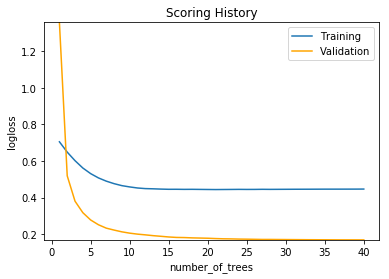

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575233987582_231


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,40.0,40.0,11349722.0,20.0,20.0,20.0,21682.0,23443.0,22624.025




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.16997622320992278
RMSE: 0.4122817279602903
LogLoss: 0.447227455966108
Mean Per-Class Error: 0.00732991817526063
AUC: 0.9970003494590576
pr_auc: 0.9937087936281862
Gini: 0.9940006989181152

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18367230094436052: 


,,0,1,Error,Rate
0,0,907642.0,11307.0,0.0123,(11307.0/918949.0)
1,1,2165.0,916936.0,0.0024,(2165.0/919101.0)
2,Total,909807.0,928243.0,0.0073,(13472.0/1838050.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.183672,0.992707,312.0
1,max f2,0.158177,0.996241,318.0
2,max f0point5,0.215976,0.990789,303.0
3,max accuracy,0.183672,0.992670,312.0
4,max precision,0.999961,1.000000,0.0
5,max recall,0.002220,1.000000,395.0
6,max specificity,0.999961,1.000000,0.0
7,max absolute_mcc,0.183672,0.985390,312.0
8,max min_per_class_accuracy,0.219431,0.990638,302.0
9,max mean_per_class_accuracy,0.183672,0.992670,312.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 22.19 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.672761,1.998638,1.998638,0.999402,0.779079,0.999402,0.779079,0.019987,0.019987,99.863783,99.863783
1,,2,0.020000,0.621536,1.990695,1.994667,0.995430,0.642226,0.997416,0.710654,0.019906,0.039893,99.069501,99.466653
2,,3,0.030000,0.594892,1.984929,1.991421,0.992547,0.607302,0.995793,0.676203,0.019850,0.059743,98.492916,99.142068
3,,4,0.040000,0.575521,1.984167,1.989607,0.992165,0.584831,0.994886,0.653361,0.019841,0.079584,98.416671,98.960724
4,,5,0.050000,0.559736,1.984385,1.988563,0.992275,0.567432,0.994364,0.636174,0.019844,0.099429,98.438516,98.856280
5,,6,0.100000,0.505809,1.985451,1.987007,0.992808,0.530180,0.993586,0.583178,0.099272,0.198701,98.545092,98.700687
6,,7,0.150000,0.471173,1.987497,1.987170,0.993830,0.487684,0.993667,0.551346,0.099375,0.298076,98.749654,98.717009
7,,8,0.200000,0.443650,1.989694,1.987801,0.994929,0.457004,0.993983,0.527761,0.099484,0.397560,98.969422,98.780112
8,,9,0.300000,0.396153,1.991022,1.988875,0.995593,0.419467,0.994520,0.491663,0.199102,0.596662,99.102166,98.887464
9,,10,0.400000,0.345098,1.991109,1.989433,0.995637,0.371632,0.994799,0.461655,0.199111,0.795773,99.110870,98.943315




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.04727205420319703
RMSE: 0.21742137476153772
LogLoss: 0.16955342270675358
Mean Per-Class Error: 0.1427197374078213
AUC: 0.9270111895855653
pr_auc: 0.5233787277637935
Gini: 0.8540223791711306

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07244043223158601: 


,,0,1,Error,Rate
0,0,176555.0,7035.0,0.0383,(7035.0/183590.0)
1,1,4906.0,7161.0,0.4066,(4906.0/12067.0)
2,Total,181461.0,14196.0,0.061,(11941.0/195657.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.072440,0.545330,257.0
1,max f2,0.035393,0.632667,303.0
2,max f0point5,0.123060,0.555781,213.0
3,max accuracy,0.160786,0.947960,187.0
4,max precision,0.812661,1.000000,0.0
5,max recall,0.000035,1.000000,399.0
6,max specificity,0.812661,1.000000,0.0
7,max absolute_mcc,0.070286,0.514997,259.0
8,max min_per_class_accuracy,0.022185,0.856452,326.0
9,max mean_per_class_accuracy,0.019259,0.857280,332.0



Gains/Lift Table: Avg response rate:  6.17 %, avg score:  2.30 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.355632,12.013602,12.013602,0.740930,0.472290,0.740930,0.472290,0.120162,0.120162,1101.360239,1101.360239
1,,2,0.020004,0.237209,10.654823,11.334212,0.657128,0.291011,0.699029,0.381651,0.106572,0.226734,965.482253,1033.421246
2,,3,0.030001,0.173856,9.325664,10.664924,0.575153,0.202794,0.657751,0.322052,0.093229,0.319964,832.566369,966.492432
3,,4,0.040004,0.134824,7.804699,9.949777,0.481349,0.153285,0.613645,0.279855,0.078064,0.398028,680.469893,894.977661
4,,5,0.050001,0.108379,7.079215,9.375840,0.436605,0.121011,0.578248,0.248096,0.070772,0.468799,607.921493,837.584033
5,,6,0.100002,0.049243,4.527982,6.951911,0.279260,0.072368,0.428754,0.160232,0.226403,0.695202,352.798228,595.191131
6,,7,0.150002,0.029549,2.229186,5.377670,0.137483,0.038059,0.331664,0.119508,0.111461,0.806663,122.918601,437.766954
7,,8,0.200003,0.020144,1.257957,4.347741,0.077584,0.024365,0.268144,0.095722,0.062899,0.869562,25.795701,334.774141
8,,9,0.299999,0.011306,0.639784,3.111798,0.039458,0.015073,0.191918,0.068840,0.063976,0.933538,-36.021578,211.179779
9,,10,0.400001,0.007123,0.276784,2.403035,0.017070,0.009034,0.148205,0.053888,0.027679,0.961217,-72.321631,140.303521




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-12-01 15:34:13,0.015 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-01 15:34:33,20.118 sec,1.0,0.407357,0.705395,0.950587,0.770818,1.812252,0.070572,0.258351,1.357399,0.764107,0.215949,1.124095,0.113418
2,,2019-12-01 15:34:39,26.174 sec,2.0,0.407683,0.648966,0.957401,0.801950,1.826518,0.062051,0.217105,0.519529,0.831483,0.352099,9.222768,0.074390
3,,2019-12-01 15:34:45,32.079 sec,3.0,0.408320,0.602267,0.963539,0.830774,1.841347,0.055330,0.214014,0.380992,0.861427,0.415209,10.848125,0.079184
4,,2019-12-01 15:34:51,38.117 sec,4.0,0.406781,0.562244,0.969137,0.856304,1.853557,0.047279,0.214368,0.318253,0.877088,0.442518,11.259645,0.071278
5,,2019-12-01 15:34:57,44.205 sec,5.0,0.406607,0.531612,0.973749,0.878353,1.867660,0.041273,0.214661,0.278392,0.886587,0.459406,11.566199,0.075893
6,,2019-12-01 15:35:03,50.262 sec,6.0,0.406680,0.508182,0.977652,0.897313,1.880922,0.036306,0.214993,0.252299,0.894079,0.468307,11.740189,0.067230
7,,2019-12-01 15:35:09,56.105 sec,7.0,0.406769,0.490517,0.980941,0.913906,1.892799,0.031939,0.215191,0.233790,0.899888,0.477135,11.856183,0.064869
8,,2019-12-01 15:35:15,1 min 2.092 sec,8.0,0.406926,0.476808,0.983728,0.928013,1.905914,0.028392,0.215441,0.223208,0.903354,0.484194,11.939035,0.065952
9,,2019-12-01 15:35:21,1 min 8.086 sec,9.0,0.406703,0.465955,0.986157,0.939947,1.917917,0.025019,0.215723,0.213567,0.906849,0.489607,11.856183,0.064097



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C247,473027.781250,1.000000,0.046972
1,C73,332519.031250,0.702959,0.033020
2,C24,314550.375000,0.664972,0.031235
3,C228,246265.671875,0.520616,0.024455
4,C155,224133.406250,0.473827,0.022257
5,C201,222750.796875,0.470904,0.022119
6,C131,197891.562500,0.418351,0.019651
7,C167,197635.718750,0.417810,0.019626
8,C104,167224.406250,0.353519,0.016606
9,C260,165693.359375,0.350283,0.016454



See the whole table with table.as_data_frame()


In [36]:
RF40_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF40_model.plot()
RF40_model

drf Model Build progress: |███████████████████████████████████████████████| 100%


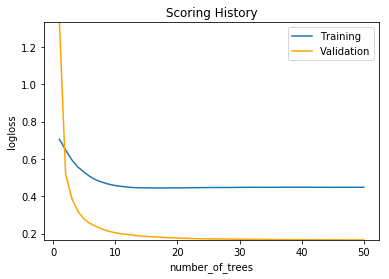

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1575233987582_303


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,14088854.0,20.0,20.0,20.0,21834.0,23282.0,22467.5




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.17076852262596734
RMSE: 0.41324148221828766
LogLoss: 0.44861529303585146
Mean Per-Class Error: 0.006824660404623151
AUC: 0.9972564070492126
pr_auc: 0.9943414839367657
Gini: 0.9945128140984252

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18712197255014573: 


,,0,1,Error,Rate
0,0,908226.0,10723.0,0.0117,(10723.0/918949.0)
1,1,1820.0,917114.0,0.002,(1820.0/918934.0)
2,Total,910046.0,927837.0,0.0068,(12543.0/1837883.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.187122,0.993208,308.0
1,max f2,0.165002,0.996549,314.0
2,max f0point5,0.219587,0.991399,297.0
3,max accuracy,0.187122,0.993175,308.0
4,max precision,0.663614,0.999352,51.0
5,max recall,0.002308,1.000000,395.0
6,max specificity,0.999820,0.999999,0.0
7,max absolute_mcc,0.187122,0.986397,308.0
8,max min_per_class_accuracy,0.223615,0.991193,296.0
9,max mean_per_class_accuracy,0.187122,0.993175,308.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 22.05 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.654931,1.997840,1.997840,0.998912,0.753732,0.998912,0.753732,0.019979,0.019979,99.783991,99.783991
1,,2,0.020000,0.610366,1.988373,1.993106,0.994178,0.629549,0.996545,0.691640,0.019884,0.039862,98.837250,99.310621
2,,3,0.030000,0.585111,1.987067,1.991093,0.993525,0.596955,0.995538,0.660079,0.019871,0.059733,98.706666,99.109302
3,,4,0.040000,0.566328,1.983149,1.989107,0.991566,0.575303,0.994545,0.638885,0.019832,0.079565,98.314911,98.910704
4,,5,0.050000,0.551104,1.984673,1.988220,0.992328,0.558456,0.994102,0.622799,0.019847,0.099412,98.467260,98.822016
5,,6,0.100000,0.500207,1.986827,1.987524,0.993405,0.523206,0.993754,0.573003,0.099341,0.198753,98.682711,98.752363
6,,7,0.150000,0.466904,1.988808,1.987952,0.994396,0.482710,0.993968,0.542905,0.099440,0.298193,98.880767,98.795164
7,,8,0.200000,0.440427,1.991681,1.988884,0.995832,0.453278,0.994434,0.520499,0.099584,0.397777,99.168056,98.888387
8,,9,0.300000,0.394826,1.993552,1.990440,0.996768,0.417265,0.995212,0.486088,0.199355,0.597132,99.355230,99.044001
9,,10,0.400000,0.346688,1.991594,1.990728,0.995789,0.371719,0.995356,0.457495,0.199159,0.796291,99.159351,99.072838




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.047143647587126705
RMSE: 0.21712587958860802
LogLoss: 0.16694143550401006
Mean Per-Class Error: 0.1404742236314589
AUC: 0.9296398260302486
pr_auc: 0.5296016310047313
Gini: 0.8592796520604973

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0665431783106644: 


,,0,1,Error,Rate
0,0,175729.0,7861.0,0.0428,(7861.0/183590.0)
1,1,4583.0,7484.0,0.3798,(4583.0/12067.0)
2,Total,180312.0,15345.0,0.0636,(12444.0/195657.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.066543,0.546038,260.0
1,max f2,0.036448,0.635534,300.0
2,max f0point5,0.134300,0.559307,203.0
3,max accuracy,0.159244,0.948292,185.0
4,max precision,0.912239,1.000000,0.0
5,max recall,0.000030,1.000000,399.0
6,max specificity,0.912239,1.000000,0.0
7,max absolute_mcc,0.059312,0.517629,268.0
8,max min_per_class_accuracy,0.022524,0.858467,323.0
9,max mean_per_class_accuracy,0.021116,0.859526,326.0



Gains/Lift Table: Avg response rate:  6.17 %, avg score:  2.30 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010002,0.356371,12.212448,12.212448,0.753194,0.469257,0.753194,0.469257,0.122151,0.122151,1121.244822,1121.244822
1,,2,0.020004,0.238566,10.381410,11.296929,0.640266,0.290822,0.696730,0.380039,0.103837,0.225988,938.140951,1029.692887
2,,3,0.030001,0.175566,9.599216,10.731218,0.592025,0.203681,0.661840,0.321273,0.095964,0.321952,859.921649,973.121755
3,,4,0.040004,0.135592,8.003545,10.049212,0.493613,0.154354,0.619778,0.279538,0.080053,0.402005,700.354476,904.921223
4,,5,0.050001,0.109186,6.913425,9.422247,0.426380,0.121236,0.581110,0.247887,0.069114,0.471120,591.342535,842.224718
5,,6,0.100002,0.049228,4.627426,7.024836,0.285393,0.072754,0.433252,0.160321,0.231375,0.702494,362.742553,602.483635
6,,7,0.150002,0.029449,2.194381,5.414685,0.135337,0.037957,0.333947,0.119533,0.109721,0.812215,119.438087,441.468452
7,,8,0.200003,0.020055,1.214865,4.364730,0.074926,0.024289,0.269191,0.095722,0.060744,0.872959,21.486494,336.472963
8,,9,0.299999,0.011171,0.629011,3.119532,0.038794,0.014961,0.192395,0.068802,0.062899,0.935858,-37.098935,211.953240
9,,10,0.400001,0.007043,0.289214,2.411944,0.017837,0.008900,0.148755,0.053827,0.028922,0.964780,-71.078590,141.194378




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-12-01 15:38:35,0.018 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-01 15:38:50,15.508 sec,1.0,0.408547,0.705988,0.949721,0.770479,1.812762,0.072340,0.257556,1.330836,0.766032,0.217547,0.967484,0.112498
2,,2019-12-01 15:38:56,21.238 sec,2.0,0.406396,0.647884,0.957023,0.797806,1.829569,0.062055,0.218055,0.518856,0.831403,0.344713,8.991448,0.076251
3,,2019-12-01 15:39:02,27.150 sec,3.0,0.405259,0.595156,0.963774,0.828436,1.844742,0.054086,0.214753,0.387544,0.860797,0.412052,10.870239,0.083549
4,,2019-12-01 15:39:08,33.496 sec,4.0,0.404937,0.556068,0.969245,0.853923,1.859405,0.046824,0.214470,0.318630,0.878857,0.442893,11.226504,0.069489
5,,2019-12-01 15:39:14,39.206 sec,5.0,0.405005,0.528492,0.973826,0.876663,1.869837,0.040953,0.214475,0.276838,0.889246,0.460690,11.491632,0.072908
6,,2019-12-01 15:39:20,44.980 sec,6.0,0.404811,0.504448,0.977923,0.896820,1.882280,0.035600,0.214998,0.253374,0.895945,0.469524,11.574485,0.069463
7,,2019-12-01 15:39:26,50.698 sec,7.0,0.405235,0.486310,0.981286,0.914047,1.895961,0.031279,0.215215,0.237341,0.900573,0.478163,11.657337,0.064986
8,,2019-12-01 15:39:31,56.472 sec,8.0,0.406008,0.474572,0.983961,0.928505,1.906474,0.027892,0.215439,0.222706,0.904770,0.484692,11.731904,0.067705
9,,2019-12-01 15:39:37,1 min 2.307 sec,9.0,0.406224,0.464600,0.986313,0.940825,1.917536,0.024676,0.215614,0.212545,0.907841,0.491247,11.798186,0.065349



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C247,522175.968750,1.000000,0.041500
1,C228,481781.343750,0.922642,0.038290
2,C73,428858.625000,0.821291,0.034084
3,C205,309109.906250,0.591965,0.024567
4,C201,300831.937500,0.576112,0.023909
5,C115,288215.375000,0.551951,0.022906
6,C155,265396.718750,0.508251,0.021093
7,C24,262504.843750,0.502713,0.020863
8,C167,228125.703125,0.436875,0.018131
9,C260,186333.781250,0.356841,0.014809



See the whole table with table.as_data_frame()


In [37]:
RF50_model.train(y = y, x = x, training_frame = train_questions,validation_frame=valid)
RF50_model.plot()
RF50_model

In [38]:
try:
    h2o.remove_all()
    h2o.cluster().shutdown()
except:
    pass

H2O session _sid_9a27 closed.
